In [4]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import preprocessing
from sklearn import feature_extraction
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.utils import resample


import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r"C:\Users\vijay\Desktop\Courses\Capstone\Analysis\Incidents_Student_Group.txt")
df.head()

,INC_UID,INC_INFO,INC_DATE,INC_MODIFY_DATE,PER_NUMBER
0,13947555,Valid Credential Entry,7/17/2021 12:52:37 AM,7/17/2021 12:52:39 AM,21NEG00123
1,13947556,Valid Credential Exit,7/17/2021 1:25:24 AM,7/17/2021 1:25:31 AM,21NEG00123
2,13947557,Valid Credential Exit,7/17/2021 1:35:23 AM,7/17/2021 1:35:29 AM,21NEG00135
3,13947560,Valid Credential Exit,7/17/2021 4:05:03 AM,7/17/2021 4:05:07 AM,21NEG00103
4,13947561,Valid Credential Exit,7/17/2021 4:05:20 AM,7/17/2021 4:05:23 AM,21NEG00104


In [6]:
df.describe()

,INC_UID
count,7.026180e+05
mean,1.454892e+07
std,3.460514e+05
min,1.394756e+07
25%,1.424062e+07
50%,1.458617e+07
75%,1.485459e+07
max,1.510968e+07


In [7]:
print(df.shape)
df.shape

(702618, 5)


(702618, 5)

In [8]:
df.nunique()

INC_UID            702618
INC_INFO             5880
INC_DATE           582883
INC_MODIFY_DATE    592450
PER_NUMBER         104426
dtype: int64

**Type OF Entery Permits**

In [9]:
analysis_data=df.groupby('PER_NUMBER')
len(analysis_data)

104426

In [10]:
FSA=df[df['PER_NUMBER'].str.contains("FSA")]
FSF=df[df['PER_NUMBER'].str.contains("FSF")]
FSC=df[df['PER_NUMBER'].str.contains("FSC")]
FCA=df[df['PER_NUMBER'].str.contains("FCA")]
WG=df[df['PER_NUMBER'].str.contains("WG")]
NEG=df[df['PER_NUMBER'].str.contains("NEG")]
NE=df[df['PER_NUMBER'].str.contains("NE0")]
RFID=df[df['PER_NUMBER'].str.contains("RFID")]
RT=df[df['PER_NUMBER'].str.contains("RT")]
BBF=df[df['PER_NUMBER'].str.contains("BBF")]
NEMP=df[df['PER_NUMBER'].str.contains("NEMP")]
others=df[df['PER_NUMBER'].str.isdigit()]
print(FSA['PER_NUMBER'].nunique(),FSF['PER_NUMBER'].nunique(),FSC['PER_NUMBER'].nunique(),WG['PER_NUMBER'].nunique(),NEG['PER_NUMBER'].nunique(),RFID['PER_NUMBER'].nunique())
print(NE['PER_NUMBER'].nunique(),NEMP['PER_NUMBER'].nunique(),BBF['PER_NUMBER'].nunique(),FCA['PER_NUMBER'].nunique(),RT['PER_NUMBER'].nunique(),others['PER_NUMBER'].nunique())

total=FSA['PER_NUMBER'].nunique()+FSF['PER_NUMBER'].nunique()+FSC['PER_NUMBER'].nunique()+WG['PER_NUMBER'].nunique()+NEG['PER_NUMBER'].nunique()+RFID['PER_NUMBER'].nunique()
+NE['PER_NUMBER'].nunique()+NEMP['PER_NUMBER'].nunique()+BBF['PER_NUMBER'].nunique()+FCA['PER_NUMBER'].nunique()+RT['PER_NUMBER'].nunique()+others['PER_NUMBER'].nunique()


6175 79 0 244 528 281
175 189 79 222 521 95142


96328

In [11]:
import matplotlib.pyplot as plt
x=["FSA","FSF","FSC","WG","NEG","RFID","NE","NEMP","BBF","FCA","RT"]
y=[FSA['PER_NUMBER'].nunique(),FSF['PER_NUMBER'].nunique(),FSC['PER_NUMBER'].nunique(),WG['PER_NUMBER'].nunique(),NEG['PER_NUMBER'].nunique(),RFID['PER_NUMBER'].nunique(),
   NE['PER_NUMBER'].nunique(),NEMP['PER_NUMBER'].nunique(),BBF['PER_NUMBER'].nunique(),FCA['PER_NUMBER'].nunique(),RT['PER_NUMBER'].nunique()]
d=pd.DataFrame({'Permits': x,'Count': y})
d

,Permits,Count
0,FSA,6175
1,FSF,79
2,FSC,0
3,WG,244
4,NEG,528
5,RFID,281
6,NE,175
7,NEMP,189
8,BBF,79
9,FCA,222


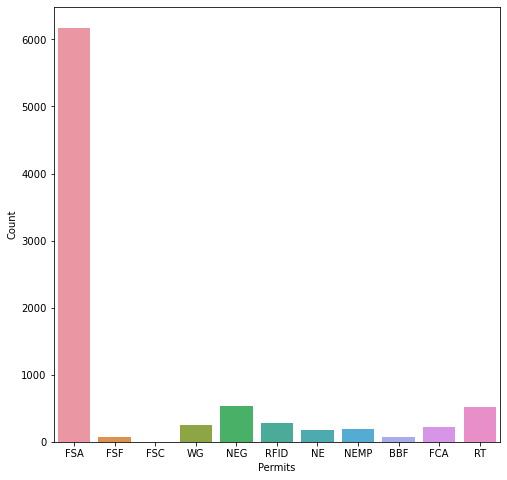

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
ax=sns.barplot(data=d, x="Permits", y="Count")




In [181]:
amount=df[df['INC_INFO'].str.contains("Amount", na=False)]
amount['INC_INFO'] = amount['INC_INFO'].map(lambda x: x.lstrip('Amount Paid: $'))
totalamount=pd.to_numeric(amount['INC_INFO']).sum()
amount['INC_INFO'].count(),totalamount
amount
#filter


,INC_UID,INC_INFO,INC_DATE,INC_MODIFY_DATE,PER_NUMBER
24,13947588,4.00,7/17/2021 9:26:31 AM,7/17/2021 9:26:34 AM,0512019540
25,13947596,2.00,7/17/2021 9:38:50 AM,7/17/2021 9:38:54 AM,0512019542
32,13947601,4.00,7/17/2021 10:05:10 AM,7/17/2021 10:05:33 AM,0512019541
35,13947606,6.00,7/17/2021 10:26:03 AM,7/17/2021 10:26:08 AM,0510018059
40,13947612,0.00,7/17/2021 10:53:40 AM,7/17/2021 10:53:56 AM,0512019545
...,...,...,...,...,...
702601,15109635,6.00,9/29/2022 10:08:39 PM,9/29/2022 10:08:58 PM,0512077003
702603,15109639,6.00,9/29/2022 10:12:09 PM,9/29/2022 10:12:24 PM,0512077004
702605,15109642,4.00,9/29/2022 10:13:08 PM,9/29/2022 10:13:19 PM,0510055719
702613,15109678,4.00,9/29/2022 11:29:26 PM,9/29/2022 11:29:29 PM,0510055720


In [182]:
amount['INC_DATE']

24         7/17/2021 9:26:31 AM
25         7/17/2021 9:38:50 AM
32        7/17/2021 10:05:10 AM
35        7/17/2021 10:26:03 AM
40        7/17/2021 10:53:40 AM
                  ...          
702601    9/29/2022 10:08:39 PM
702603    9/29/2022 10:12:09 PM
702605    9/29/2022 10:13:08 PM
702613    9/29/2022 11:29:26 PM
702614    9/29/2022 11:31:06 PM
Name: INC_DATE, Length: 88566, dtype: object

In [183]:
amount['Dates'] = pd.to_datetime(amount['INC_DATE']).dt.date
amount['Time'] = pd.to_datetime(amount['INC_DATE']).dt.time
amount

,INC_UID,INC_INFO,INC_DATE,INC_MODIFY_DATE,PER_NUMBER,Dates,Time
24,13947588,4.00,7/17/2021 9:26:31 AM,7/17/2021 9:26:34 AM,0512019540,2021-07-17,09:26:31
25,13947596,2.00,7/17/2021 9:38:50 AM,7/17/2021 9:38:54 AM,0512019542,2021-07-17,09:38:50
32,13947601,4.00,7/17/2021 10:05:10 AM,7/17/2021 10:05:33 AM,0512019541,2021-07-17,10:05:10
35,13947606,6.00,7/17/2021 10:26:03 AM,7/17/2021 10:26:08 AM,0510018059,2021-07-17,10:26:03
40,13947612,0.00,7/17/2021 10:53:40 AM,7/17/2021 10:53:56 AM,0512019545,2021-07-17,10:53:40
...,...,...,...,...,...,...,...
702601,15109635,6.00,9/29/2022 10:08:39 PM,9/29/2022 10:08:58 PM,0512077003,2022-09-29,22:08:39
702603,15109639,6.00,9/29/2022 10:12:09 PM,9/29/2022 10:12:24 PM,0512077004,2022-09-29,22:12:09
702605,15109642,4.00,9/29/2022 10:13:08 PM,9/29/2022 10:13:19 PM,0510055719,2022-09-29,22:13:08
702613,15109678,4.00,9/29/2022 11:29:26 PM,9/29/2022 11:29:29 PM,0510055720,2022-09-29,23:29:26


In [184]:
s=amount
#s = s.drop("INC_UID", axis='columns')
s['INC_INFO'] = s['INC_INFO'].astype(float)

In [185]:
s = s.drop('INC_UID', axis=1)
s

,INC_INFO,INC_DATE,INC_MODIFY_DATE,PER_NUMBER,Dates,Time
24,4.0,7/17/2021 9:26:31 AM,7/17/2021 9:26:34 AM,0512019540,2021-07-17,09:26:31
25,2.0,7/17/2021 9:38:50 AM,7/17/2021 9:38:54 AM,0512019542,2021-07-17,09:38:50
32,4.0,7/17/2021 10:05:10 AM,7/17/2021 10:05:33 AM,0512019541,2021-07-17,10:05:10
35,6.0,7/17/2021 10:26:03 AM,7/17/2021 10:26:08 AM,0510018059,2021-07-17,10:26:03
40,0.0,7/17/2021 10:53:40 AM,7/17/2021 10:53:56 AM,0512019545,2021-07-17,10:53:40
...,...,...,...,...,...,...
702601,6.0,9/29/2022 10:08:39 PM,9/29/2022 10:08:58 PM,0512077003,2022-09-29,22:08:39
702603,6.0,9/29/2022 10:12:09 PM,9/29/2022 10:12:24 PM,0512077004,2022-09-29,22:12:09
702605,4.0,9/29/2022 10:13:08 PM,9/29/2022 10:13:19 PM,0510055719,2022-09-29,22:13:08
702613,4.0,9/29/2022 11:29:26 PM,9/29/2022 11:29:29 PM,0510055720,2022-09-29,23:29:26


In [188]:
s.index = pd.to_datetime(s.pop('INC_DATE'))
s

,INC_INFO,INC_MODIFY_DATE,PER_NUMBER,Dates,Time
INC_DATE,,,,,
2021-07-17 09:26:31,4.0,7/17/2021 9:26:34 AM,0512019540,2021-07-17,09:26:31
2021-07-17 09:38:50,2.0,7/17/2021 9:38:54 AM,0512019542,2021-07-17,09:38:50
2021-07-17 10:05:10,4.0,7/17/2021 10:05:33 AM,0512019541,2021-07-17,10:05:10
2021-07-17 10:26:03,6.0,7/17/2021 10:26:08 AM,0510018059,2021-07-17,10:26:03
2021-07-17 10:53:40,0.0,7/17/2021 10:53:56 AM,0512019545,2021-07-17,10:53:40
...,...,...,...,...,...
2022-09-29 22:08:39,6.0,9/29/2022 10:08:58 PM,0512077003,2022-09-29,22:08:39
2022-09-29 22:12:09,6.0,9/29/2022 10:12:24 PM,0512077004,2022-09-29,22:12:09
2022-09-29 22:13:08,4.0,9/29/2022 10:13:19 PM,0510055719,2022-09-29,22:13:08


In [196]:
resamp= s.resample('H').sum()
resamp

,INC_INFO
INC_DATE,
2021-07-17 09:00:00,6.0
2021-07-17 10:00:00,10.0
2021-07-17 11:00:00,0.0
2021-07-17 12:00:00,0.0
2021-07-17 13:00:00,10.0
...,...
2022-09-29 19:00:00,70.0
2022-09-29 20:00:00,36.0
2022-09-29 21:00:00,38.0


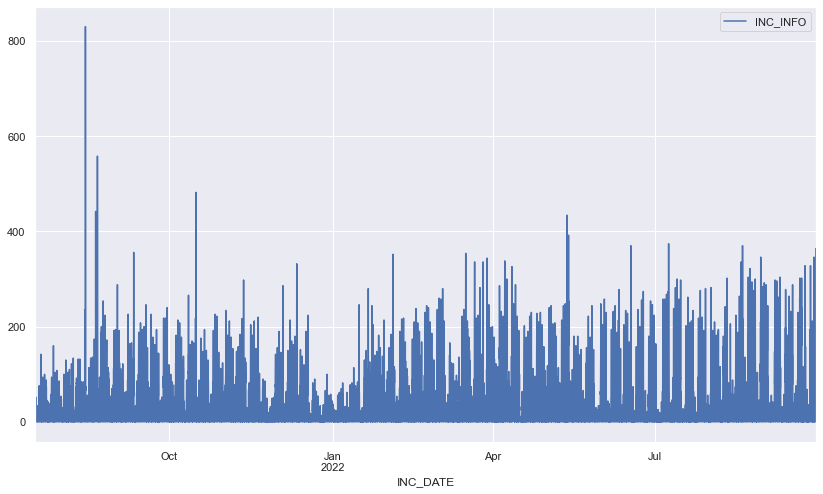

In [201]:
#HourWise Analysis
s.resample('H').sum().plot()

<AxesSubplot:xlabel='INC_DATE'>

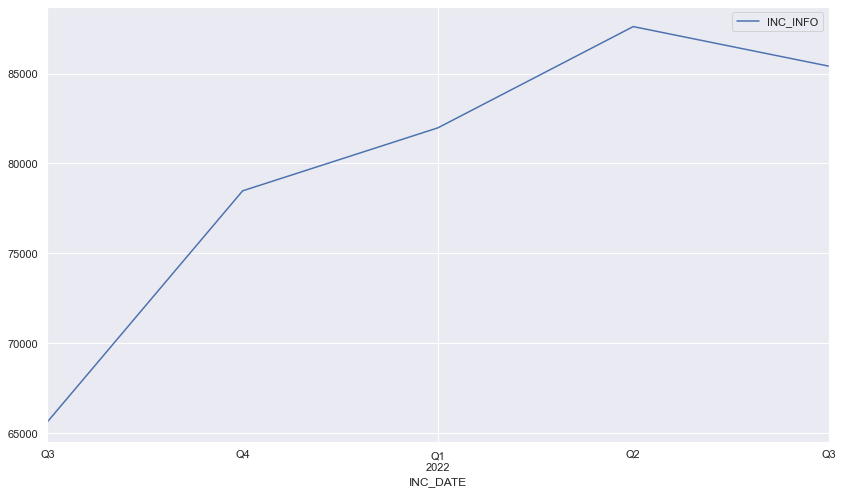

In [202]:
s.resample('Q').sum().plot()

<AxesSubplot:xlabel='INC_DATE'>

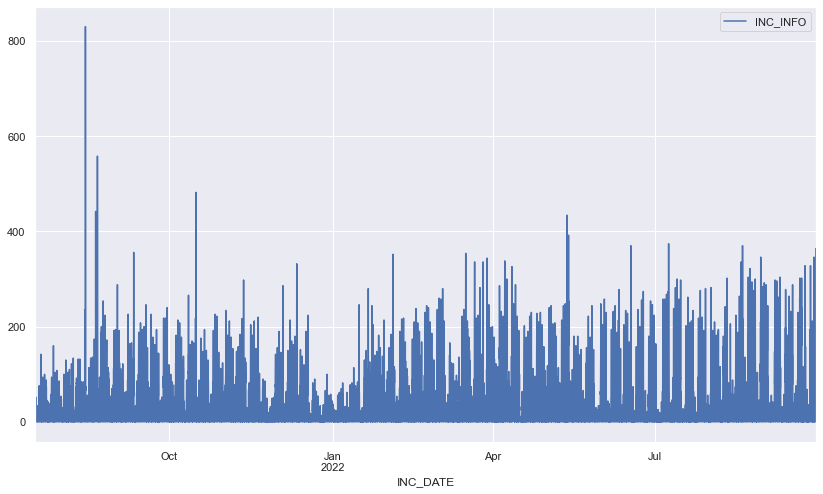

In [192]:
s.resample('H').sum().plot()

In [190]:
#MonthWise Projection
s.resample('M').sum()

,INC_INFO
INC_DATE,
2021-07-31,7500.0
2021-08-31,27610.0
2021-09-30,30522.0
2021-10-31,31074.0
2021-11-30,26274.0
2021-12-31,21130.0
2022-01-31,19146.0
2022-02-28,29586.0
2022-03-31,33248.0


<AxesSubplot:xlabel='Dates'>

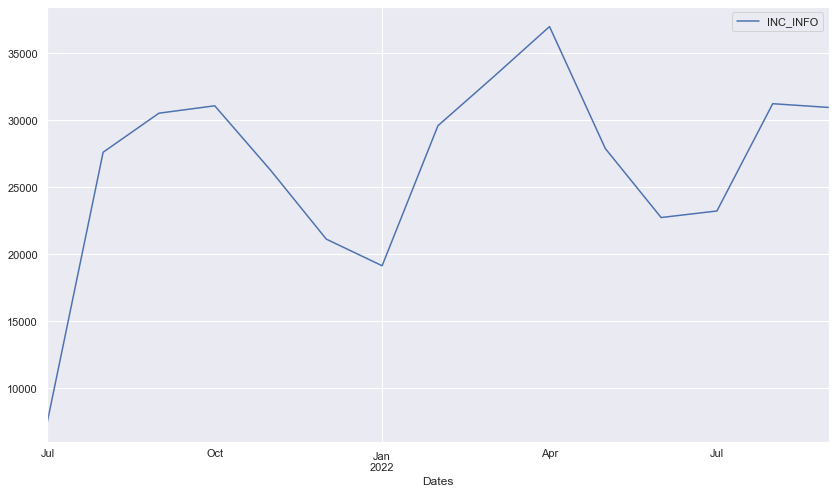

In [178]:
#MonthWise Projection
s.resample('M').sum().plot()

<AxesSubplot:xlabel='INC_DATE'>

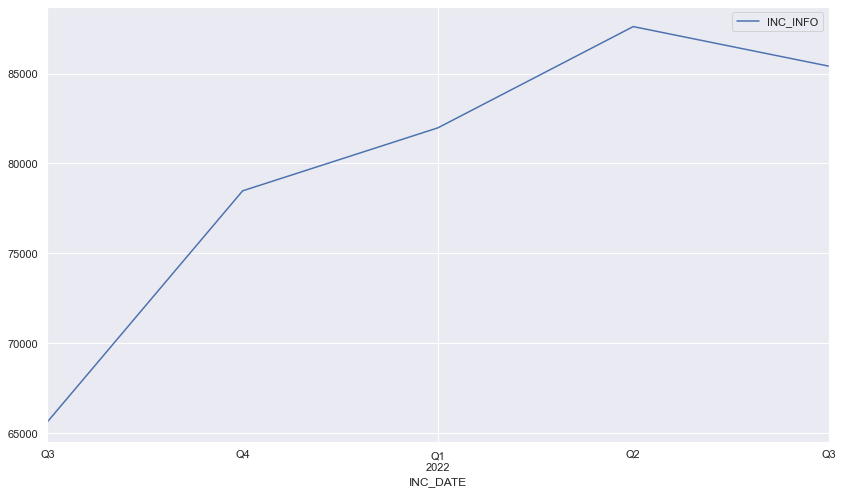

In [203]:
s.resample('Q').sum().plot()

In [174]:
s.resample('Y').sum()

,INC_INFO
Dates,
2021-12-31,144110.0
2022-12-31,255000.0


<AxesSubplot:xlabel='Dates'>

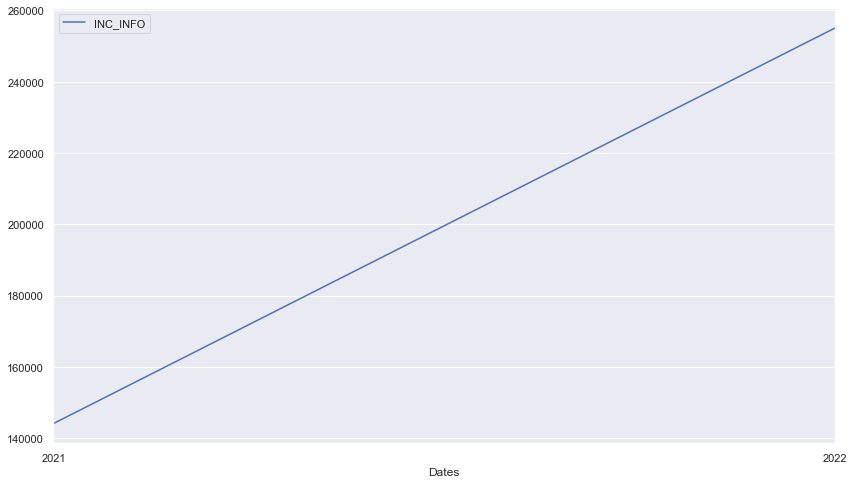

In [175]:
#Year Wise Projection
s.resample('Y').sum().plot()

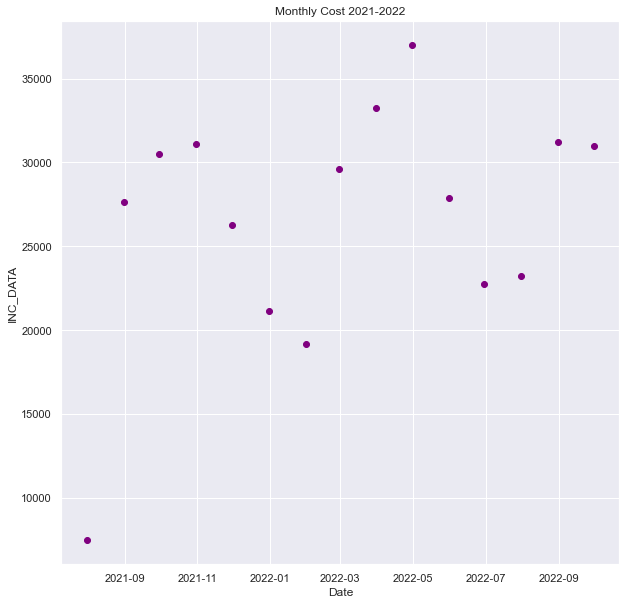

In [57]:
#Plotting Points - Month Wise
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(s.resample('M').sum().index.values,
           s.resample('M').sum()['INC_INFO'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="INC_DATA",
       title="Monthly Cost 2021-2022")

plt.show()

In [13]:
analysis_data.get_group('0512019540')


,INC_UID,INC_INFO,INC_DATE,INC_MODIFY_DATE,PER_NUMBER
8,13947571,Valid Transient Entry,7/17/2021 7:45:58 AM,7/17/2021 7:46:13 AM,0512019540
23,13947589,Valid Transient Exit,7/17/2021 9:26:31 AM,7/17/2021 9:26:35 AM,0512019540
24,13947588,Amount Paid: $4.00,7/17/2021 9:26:31 AM,7/17/2021 9:26:34 AM,0512019540


In [15]:
analysis_data.get_group('RFID00294')

,INC_UID,INC_INFO,INC_DATE,INC_MODIFY_DATE,PER_NUMBER
5,13947568,Valid Credential Entry,7/17/2021 7:30:01 AM,7/17/2021 7:30:03 AM,RFID00294
9,13947572,Valid Credential Exit,7/17/2021 7:47:37 AM,7/17/2021 7:47:43 AM,RFID00294
182755,14254019,Valid Credential Entry,11/7/2021 8:38:02 AM,11/7/2021 8:38:04 AM,RFID00294
182756,14254024,Valid Credential Exit,11/7/2021 8:51:31 AM,11/7/2021 8:51:37 AM,RFID00294
224219,14329197,Valid Credential Entry,12/5/2021 9:13:38 AM,12/5/2021 9:13:43 AM,RFID00294
224224,14329208,Valid Credential Exit,12/5/2021 9:36:43 AM,12/5/2021 9:36:48 AM,RFID00294
240969,14361986,Valid Credential Entry,12/15/2021 12:28:07 AM,12/15/2021 12:28:09 AM,RFID00294
240970,14361988,Valid Credential Exit,12/15/2021 12:34:11 AM,12/15/2021 12:34:15 AM,RFID00294
250053,14377300,Valid Credential Entry,12/21/2021 7:23:31 PM,12/21/2021 7:23:33 PM,RFID00294
250059,14377307,Valid Credential Exit,12/21/2021 7:33:50 PM,12/21/2021 7:33:57 PM,RFID00294
